In [87]:
class BinaryController:
    """
    binary controller class
    """

    def __init__(self):
        pass

    def set_conf(
            self,
            _min: float,
            _max: float,
            reverse: bool = False
    ):

        assert isinstance(float(_min), float)
        assert isinstance(float(_max), float)
        assert isinstance(reverse, bool)

        self._min = _min
        self._max = _max
        self.lock = False
        self.reverse = reverse

    def __lock(self, sensor):
        if sensor >= self._max:
            self.lock = True

    def __unlock(self, sensor):
        if sensor <= self._min:
            self.lock = False

    def proc(self, sensor):
        assert isinstance(float(sensor), float)

        self.__lock(sensor)
        self.__unlock(sensor)
        if (
                self._min < sensor <= self._max
                and
                not self.lock
        ):
            return 1
        elif sensor <= self._min:
            return 1
        else:
            return 0

In [73]:
ctl = BinaryController()
ctl.set_conf(0.2,0.5)
ctl.proc(0.21)

0

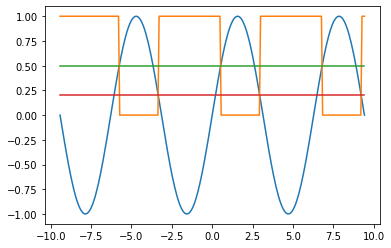

In [110]:
from pylab import *

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
X = 3*X
C,S = np.cos(X), np.sin(X)
ctl = BinaryController()
ctl.set_conf(0.2,0.5)

signal = []
for _ in S:
    signal.append(ctl.proc(_))
    
_max = []
for _ in range(len(S)):
    _max.append(0.5)

_min = []
for _ in range(len(S)):
    _min.append(0.2)
    
plot(X,S)
plot(X,signal)
plot(X, _max)
plot(X, _min)
show()
